In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime, date, timedelta
%matplotlib inline

In [119]:
%pprint

Pretty printing has been turned ON


In [120]:
Cab_data = pd.read_csv('Cab_data.csv')
City = pd.read_csv('City.csv')
Customer_ID = pd.read_csv('Customer_ID.csv')
Transaction_ID = pd.read_csv('Transaction_ID.csv')

In [121]:
# Let's try to gain some basic understanding about the data, including field names and data types

In [122]:
Cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [123]:
Cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [124]:
Cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


For the dataset Cab_data, one thing to point out is, although the two variables 'Transaction ID' and 'Date of Travel' has their data type as integer, it is meaningless to treat them as numerical values.

In [125]:
City.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [126]:
City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [127]:
City.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


For the dataset City, although the variable Population Ysersshould be integers, their data type is actually not interger, some transformation is needed to make the data processable for EDA. 

In [128]:
Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [129]:
Customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [130]:
Customer_ID.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


Nice, among four variables we have three numerical variables: Customer ID, Age, and Income

In [131]:
Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [132]:
Transaction_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [133]:
Transaction_ID.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


Although we have two variables with type 'integer' here, there isn't any meaning to view them as numerical values since they all represent the ID of a transaction/a customer.

In [134]:
# Firstly, let's make the dataset City to be actually processible
Population = []
for i in range(len(City['Population'])):
    x = City['Population'][i].replace(' ','')
    x = x.replace(',','')
    x = float(x)
    Population.append(x)

Users = []
for i in range(len(City['Users'])):
    x = City['Users'][i].replace(' ','')
    x = x.replace(',','')
    x = float(x)
    Users.append(x)

In [135]:
City['Population'] = Population
City['Users'] = Users

In [136]:
City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


Nice, we successfully transformed our dataset City

Here we also need to modify our dataset Customer ID and Transaction ID

In [137]:
for i in range(len(Customer_ID)):
    if 'Male' in str(Customer_ID.loc[i]['Gender']):
        Customer_ID.loc[i]['Gender'] = 'Male'
    elif 'Female' in str(Customer_ID.loc[i]['Gender']):
        Customer_ID.loc[i]['Gender'] = 'Female'

C:\Users\HGY\AppData\Local\Temp\ipykernel_3752\2096422017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Customer_ID.loc[i]['Gender'] = 'Male'
C:\Users\HGY\AppData\Local\Temp\ipykernel_3752\2096422017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Customer_ID.loc[i]['Gender'] = 'Female'


Firstly let's see if we have any missing value in our datasets.

<AxesSubplot:>

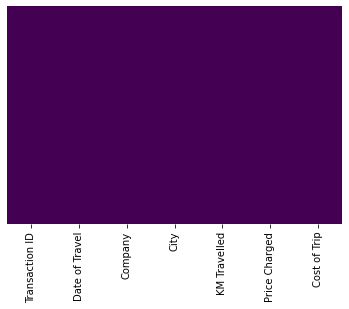

In [138]:
sns.heatmap(Cab_data.isnull(), yticklabels=False, cbar=False, cmap='viridis') 

In [139]:
Cab_data.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

<AxesSubplot:>

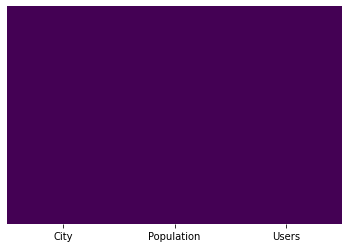

In [140]:
sns.heatmap(City.isnull(), yticklabels=False, cbar=False, cmap='viridis') 

In [141]:
City.isna().sum()

City          0
Population    0
Users         0
dtype: int64

<AxesSubplot:>

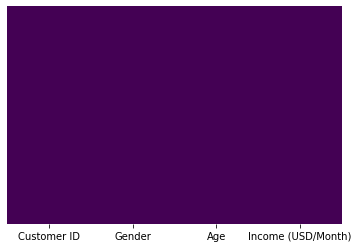

In [142]:
sns.heatmap(Customer_ID.isnull(), yticklabels=False, cbar=False, cmap='viridis') 

In [143]:
Customer_ID.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

<AxesSubplot:>

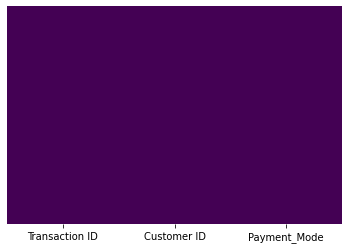

In [144]:
sns.heatmap(Transaction_ID.isnull(), yticklabels=False, cbar=False, cmap='viridis') 

In [145]:
Transaction_ID.isna().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

# looks like we don't any null values, this is a good sign!

One more thing is, the Date of Travel is represented by integers, for convenience we will convert them into datatime objects.

In [146]:
Cab_data['Date of Travel'].value_counts()

43105    2022
43084    1123
43077    1100
43449    1086
43063    1085
         ... 
42388      88
42381      86
42380      85
42374      47
42373      25
Name: Date of Travel, Length: 1095, dtype: int64

1095 is exactly the number of days in three years

In [147]:
min(Cab_data['Date of Travel'])

42371

This number is the number corresponding to date 2016/1/1

In [148]:
Date_of_Travel = []
for i in range(len(Cab_data)):
    if Cab_data['Date of Travel'][i] == 42371:
        Date_of_Travel.append(datetime.strptime('2016/1/1',"%Y/%m/%d"))
    else:
        date_difference = int(Cab_data['Date of Travel'][i] - 42371)
        Date_of_Travel.append(datetime.strptime('2016/1/1',"%Y/%m/%d") + 
                              timedelta(days = date_difference))

Cab_data['Date of Travel Renewed'] = Date_of_Travel

Nice now we have the renewed date for dataset Cab_data

In [149]:
Cab_data.drop(['Date of Travel'], axis=1, inplace = True)

In [150]:
Cab_data['Date of Travel'] = Date_of_Travel

In [151]:
Cab_data.drop(['Date of Travel Renewed'], axis=1, inplace = True)

In [152]:
Cab_data.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date of Travel
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02


# Ok Now we converted the Date of Travel column to Datetime objects

The last thing to do is to limit the time interval from 31/01/2016 to 31/12/2018

In [153]:
datelist = pd.date_range(datetime.strptime('2016/1/1',"%Y/%m/%d"), periods=30).tolist()

In [154]:
Cab_data[Cab_data['Date of Travel'].isin(datelist)]

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date of Travel
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-07
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-05
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016-01-01
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016-01-06
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016-01-02
...,...,...,...,...,...,...,...
5614,10007252,Yellow Cab,WASHINGTON DC,26.45,569.48,342.7920,2016-01-30
5616,10007254,Yellow Cab,WASHINGTON DC,9.80,176.63,119.9520,2016-01-29
5618,10007256,Yellow Cab,WASHINGTON DC,18.24,389.78,260.4672,2016-01-30
5620,10007258,Yellow Cab,WASHINGTON DC,5.00,110.82,68.4000,2016-01-30


In [155]:
Cab_data.drop(Cab_data[Cab_data['Date of Travel'].isin(datelist)].index, inplace = True)

In [156]:
Cab_data = Cab_data.reset_index()

In [157]:
Cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354746 entries, 0 to 354745
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   index           354746 non-null  int64         
 1   Transaction ID  354746 non-null  int64         
 2   Company         354746 non-null  object        
 3   City            354746 non-null  object        
 4   KM Travelled    354746 non-null  float64       
 5   Price Charged   354746 non-null  float64       
 6   Cost of Trip    354746 non-null  float64       
 7   Date of Travel  354746 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 21.7+ MB


Comparing to the initial information, the number of rows decreased by 4646, which is the number of transactions happend from 2016/01/01 to 2016/01/30

# EDA section

Before starting the exploratory data analysis, we need some hypothesis on which the following analysis will focus on

Hypothesis one: Is there any difference between the two cab companies, including the profit made annually, the average profit made from each ride, each Km covered, and the cost-profit efficiency (Given fixed cost, how much profit can be made)?

In [158]:
Cab_data_pink = Cab_data[Cab_data['Company'] == 'Pink Cab']

In [159]:
Cab_data_pink

,index,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date of Travel
0,3303,10004263,Pink Cab,ATLANTA GA,25.07,355.29,285.798,2016-02-01
1,3311,10004271,Pink Cab,BOSTON MA,38.61,358.05,405.405,2016-01-31
2,3343,10004303,Pink Cab,CHICAGO IL,25.68,347.96,264.504,2016-01-31
3,3348,10004308,Pink Cab,DALLAS TX,22.26,208.20,249.312,2016-01-31
4,3354,10004314,Pink Cab,DENVER CO,31.59,269.59,353.808,2016-01-31
...,...,...,...,...,...,...,...,...
352803,357449,10437610,Pink Cab,WASHINGTON DC,13.56,184.19,135.600,2018-01-05
352804,357450,10437611,Pink Cab,WASHINGTON DC,29.68,388.08,302.736,2018-12-30
352805,357451,10437612,Pink Cab,WASHINGTON DC,28.50,369.04,310.650,2018-01-06
352806,357452,10437614,Pink Cab,WASHINGTON DC,16.10,194.17,162.610,2018-01-01


In [160]:
Cab_data_yellow = Cab_data[Cab_data['Company'] == 'Yellow Cab']

In [161]:
Cab_data_pink = Cab_data_pink.reset_index()

In [162]:
Cab_data_yellow = Cab_data_yellow.reset_index()

In [163]:
Profit_pink = []
for i in range(len(Cab_data_pink)):
    profit = Cab_data_pink['Price Charged'][i] - Cab_data_pink['Cost of Trip'][i]
    Profit_pink.append(profit)
    
Profit_yellow = []
for i in range(len(Cab_data_yellow)):
    profit = Cab_data_yellow['Price Charged'][i] - Cab_data_yellow['Cost of Trip'][i]
    Profit_yellow.append(profit)

In [164]:
Cab_data_pink['Profit'] = Profit_pink
Cab_data_yellow['Profit'] = Profit_yellow

In [165]:
pink_sum_profit = sum(Cab_data_pink['Profit'])
yellow_sum_profit = sum(Cab_data_yellow['Profit'])
# Cauculating the sum of profit made by two companies

In [166]:
pink_mean_profit = Cab_data_pink['Profit'].mean()
yellow_mean_profit = Cab_data_yellow['Profit'].mean()

In [167]:
pink_profit_per_km = Cab_data_pink['Profit'].mean()/Cab_data_pink['KM Travelled'].mean()
yellow_profit_per_km = Cab_data_yellow['Profit'].mean()/Cab_data_yellow['KM Travelled'].mean()

In [168]:
pink_cost_per_km = Cab_data_pink['Cost of Trip'].mean()/Cab_data_pink['KM Travelled'].mean()
yellow_cost_per_km = Cab_data_yellow['Cost of Trip'].mean()/Cab_data_yellow['KM Travelled'].mean()

In [169]:
pink_cost_per_ride = sum(Cab_data_pink['Cost of Trip'])/len(Cab_data_pink['Transaction ID'])
yellow_cost_per_ride = sum(Cab_data_yellow['Cost of Trip'])/len(Cab_data_yellow['Transaction ID'])

In [170]:
pink_cost_profit_efficiency = 100 * (Cab_data_pink['Profit'].mean()/Cab_data_pink['Cost of Trip'].mean())
yellow_cost_profit_efficiency = 100 * (Cab_data_yellow['Profit'].mean()/Cab_data_yellow['Cost of Trip'].mean())

In [171]:
Brief_summary = pd.DataFrame([['Pink Cab', pink_sum_profit, pink_mean_profit, pink_profit_per_km, pink_cost_per_km, pink_cost_per_ride, pink_cost_profit_efficiency], 
                                ['Yellow Cab', yellow_sum_profit, yellow_mean_profit, yellow_profit_per_km, yellow_cost_per_km, yellow_cost_per_ride, yellow_cost_profit_efficiency]],
                                 columns = ['Company Name', 'Total Profit', 'Profit Per Ride', 'Profit Per Km', 'Cost Per Km', 'Cost per ride', 'Profit made per 100$ of cost'])

In [172]:
Brief_summary

,Company Name,Total Profit,Profit Per Ride,Profit Per Km,Cost Per Km,Cost per ride,Profit made per 100$ of cost
0,Pink Cab,5.233375e+06,62.462707,2.768902,10.999493,248.133762,25.172998
1,Yellow Cab,4.318407e+07,159.373141,7.062204,13.200348,297.892961,53.500137


Hypothesis one answer: Based on the bried summary, it is evident that the company 'Yellow Cab' outweighs 'Pink Cab', given it makes more profit from each ride, each Km covered, and each $100 of cost. However, 'Pink Cab' is more efficient given its cost per km is lower.

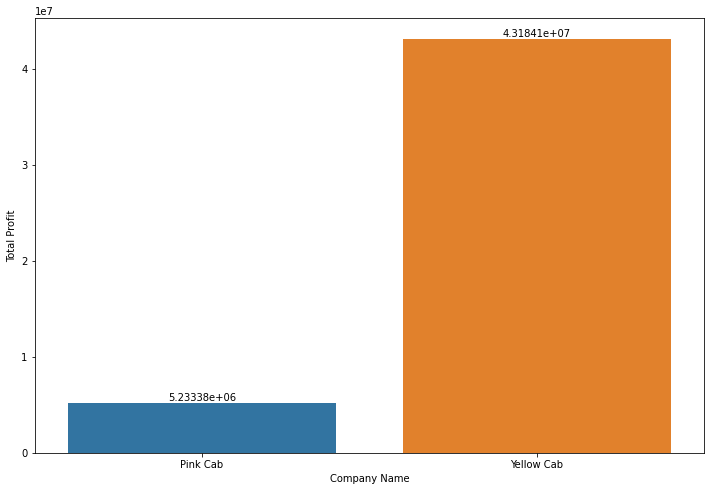

In [173]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Company Name',y='Total Profit',data=Brief_summary)
for i in ax.containers:
    ax.bar_label(i,)

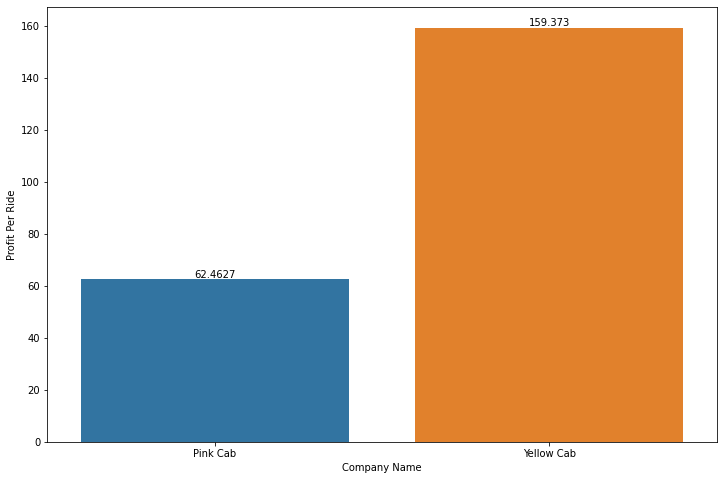

In [174]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Company Name',y='Profit Per Ride',data=Brief_summary)
for i in ax.containers:
    ax.bar_label(i,)

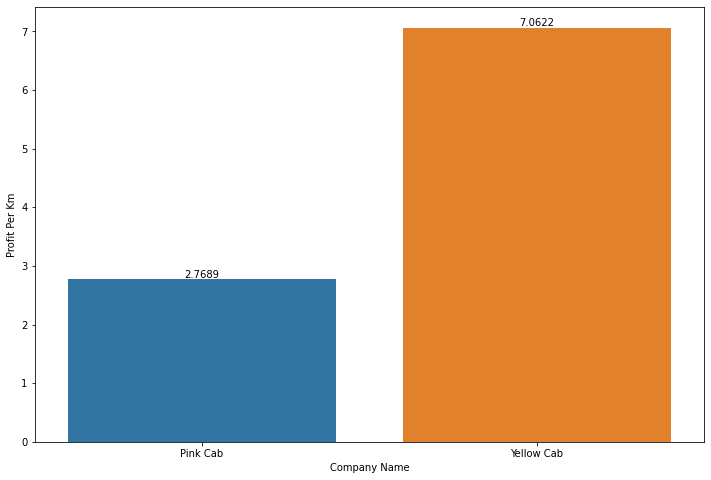

In [175]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Company Name',y='Profit Per Km',data=Brief_summary)
for i in ax.containers:
    ax.bar_label(i,)

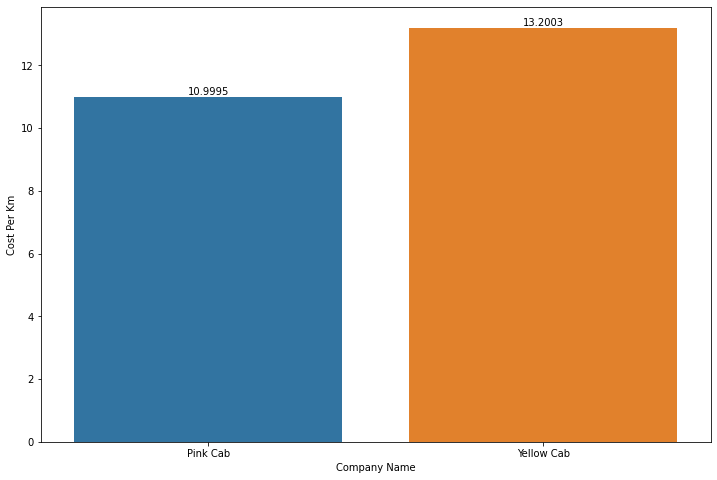

In [176]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Company Name',y='Cost Per Km',data=Brief_summary)
for i in ax.containers:
    ax.bar_label(i,)

Hypothesis two: Does the profit made by the two cab companies different in its distribution with respect different years, how about the profit distribution with respect to different time intervals in a year?

In [177]:
Cab_data_pink_year = []
for i in range(len(Cab_data_pink)):
    Cab_data_pink_year.append(Cab_data_pink['Date of Travel'][i].year)

Cab_data_pink['Year'] = Cab_data_pink_year

In [178]:
Cab_data_pink_month = []
for i in range(len(Cab_data_pink)):
    Cab_data_pink_month.append(Cab_data_pink['Date of Travel'][i].month)
    
Cab_data_pink['Month'] = Cab_data_pink_month  

In [179]:
Cab_data_pink_day = []
for i in range(len(Cab_data_pink)):
    Cab_data_pink_day.append(Cab_data_pink['Date of Travel'][i].day)
    
Cab_data_pink['day'] = Cab_data_pink_day  

In [180]:
Cab_data_yellow_year = []
for i in range(len(Cab_data_yellow)):
    Cab_data_yellow_year.append(Cab_data_yellow['Date of Travel'][i].year)

Cab_data_yellow['Year'] = Cab_data_yellow_year

In [181]:
Cab_data_yellow_month = []
for i in range(len(Cab_data_yellow)):
    Cab_data_yellow_month.append(Cab_data_yellow['Date of Travel'][i].month)
    
Cab_data_yellow['Month'] = Cab_data_yellow_month

In [182]:
Cab_data_yellow_day = []
for i in range(len(Cab_data_yellow)):
    Cab_data_yellow_day.append(Cab_data_yellow['Date of Travel'][i].day)
    
Cab_data_yellow['Day'] = Cab_data_yellow_day

In [183]:
pink_total_profit_2016 = sum(Cab_data_pink[Cab_data_pink['Year'] == 2016]['Profit'])
pink_total_profit_2017 = sum(Cab_data_pink[Cab_data_pink['Year'] == 2017]['Profit'])
pink_total_profit_2018 = sum(Cab_data_pink[Cab_data_pink['Year'] == 2018]['Profit'])
yellow_total_profit_2016 = sum(Cab_data_yellow[Cab_data_yellow['Year'] == 2016]['Profit'])
yellow_total_profit_2017 = sum(Cab_data_yellow[Cab_data_yellow['Year'] == 2017]['Profit'])
yellow_total_profit_2018 = sum(Cab_data_yellow[Cab_data_yellow['Year'] == 2018]['Profit'])

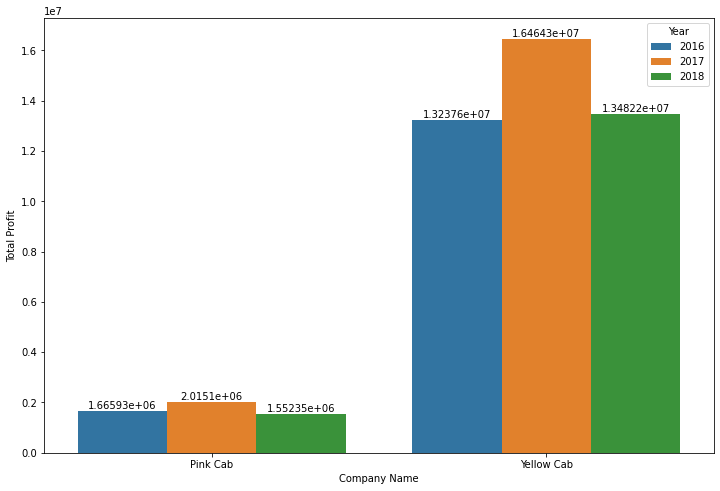

In [184]:
Profit_by_year = pd.DataFrame([[pink_total_profit_2016, 2016,'Pink Cab'],
                                [pink_total_profit_2017, 2017,'Pink Cab'],
                                [pink_total_profit_2018, 2018,'Pink Cab'],
                                [yellow_total_profit_2016, 2016,'Yellow Cab'],
                                [yellow_total_profit_2017, 2017,'Yellow Cab'],
                                [yellow_total_profit_2018, 2018,'Yellow Cab']],
                                 columns = ['Total Profit','Year', 'Company Name'])
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Company Name',y='Total Profit', hue = 'Year',data= Profit_by_year)
for i in ax.containers:
    ax.bar_label(i,)

Hypothesis 2 answer: From this chart, the distribution of profit with respect to different years for the two companies share a same property: reaching its peak at 2017, and fall back on 2018, however, the fall back experienced by 'Pink Cab' is more severe than the fall back of 'Yellow Cab' given the profit of 'Pink Cab' in 2018 is less then its profit in 2016, while the profit in 2018 for 'Yellow Cab' still exceeds its profit in 2016.

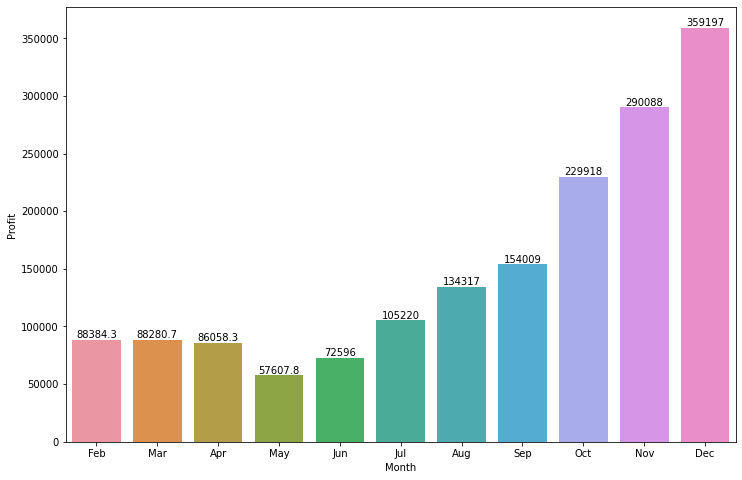

In [185]:
Cab_data_pink_2016 = Cab_data_pink[Cab_data_pink['Year'] == 2016]

Pink_profit_2016_by_month = []
for i in range(2,13):
    Pink_profit_2016_by_month.append(sum(Cab_data_pink_2016[Cab_data_pink_2016['Month']==i]['Profit']))

# The reason we exclude Jan is because the time interval starts from Jan 31

Pink_profit_2016_by_month

Pink_profit_2016_month = ['Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

Pink_profit_2016_by_month = pd.DataFrame(Pink_profit_2016_by_month, columns = ['Profit'])

Pink_profit_2016_by_month['Month'] = Pink_profit_2016_month

plt.figure(figsize=(12,8))
ax = sns.barplot(x='Month',y='Profit',data=Pink_profit_2016_by_month)
for i in ax.containers:
    ax.bar_label(i,)

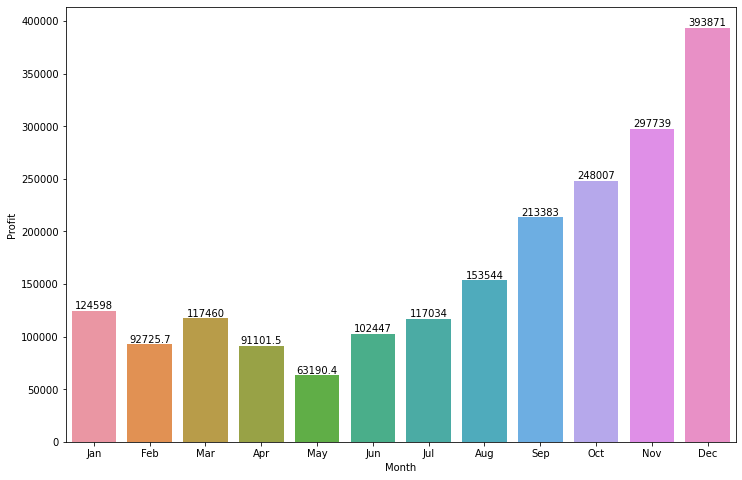

In [186]:
Cab_data_pink_2017 = Cab_data_pink[Cab_data_pink['Year'] == 2017]

Pink_profit_2017_by_month = []
for i in range(1,13):
    Pink_profit_2017_by_month.append(sum(Cab_data_pink_2017[Cab_data_pink_2017['Month']==i]['Profit']))

Pink_profit_2017_by_month

Pink_profit_2017_month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

Pink_profit_2017_by_month = pd.DataFrame(Pink_profit_2017_by_month, columns = ['Profit'])

Pink_profit_2017_by_month['Month'] = Pink_profit_2017_month

plt.figure(figsize=(12,8))
ax = sns.barplot(x='Month',y='Profit',data=Pink_profit_2017_by_month)
for i in ax.containers:
    ax.bar_label(i,)

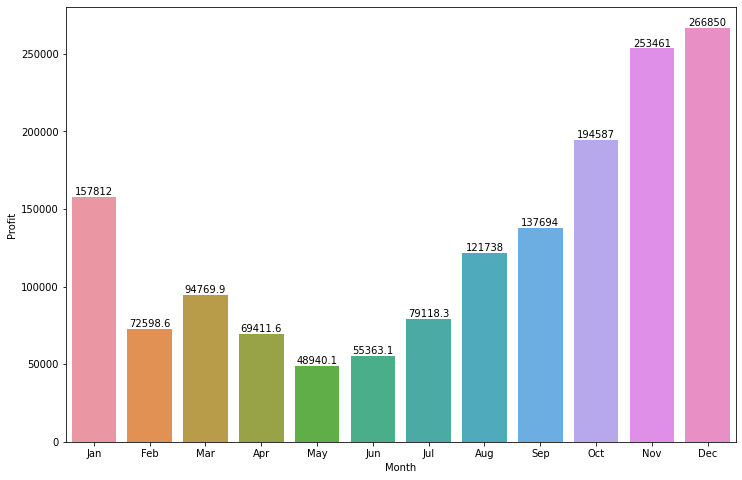

In [187]:
Cab_data_pink_2018 = Cab_data_pink[Cab_data_pink['Year'] == 2018]

Pink_profit_2018_by_month = []
for i in range(1,13):
    Pink_profit_2018_by_month.append(sum(Cab_data_pink_2018[Cab_data_pink_2018['Month']==i]['Profit']))

Pink_profit_2018_month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

Pink_profit_2018_by_month = pd.DataFrame(Pink_profit_2018_by_month, columns = ['Profit'])

Pink_profit_2018_by_month['Month'] = Pink_profit_2018_month

plt.figure(figsize=(12,8))
ax = sns.barplot(x='Month',y='Profit',data=Pink_profit_2018_by_month)
for i in ax.containers:
    ax.bar_label(i,)

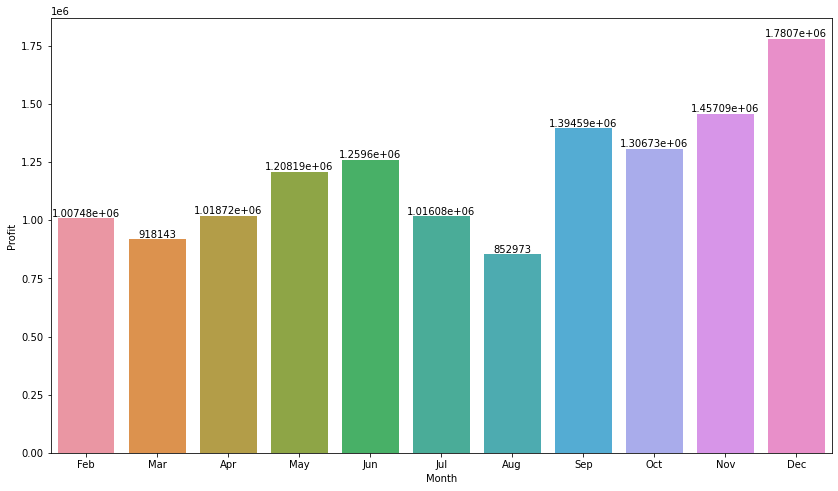

In [188]:
Cab_data_yellow_2016 = Cab_data_yellow[Cab_data_yellow['Year'] == 2016]

Yellow_profit_2016_by_month = []
for i in range(2,13):
    Yellow_profit_2016_by_month.append(sum(Cab_data_yellow_2016[Cab_data_yellow_2016['Month']==i]['Profit']))

# The reason we exclude Jan is because the time interval starts from Jan 31

Yellow_profit_2016_month = ['Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

Yellow_profit_2016_by_month = pd.DataFrame(Yellow_profit_2016_by_month, columns = ['Profit'])

Yellow_profit_2016_by_month['Month'] = Yellow_profit_2016_month

plt.figure(figsize=(14,8))
ax = sns.barplot(x='Month',y='Profit',data=Yellow_profit_2016_by_month)
for i in ax.containers:
    ax.bar_label(i,)

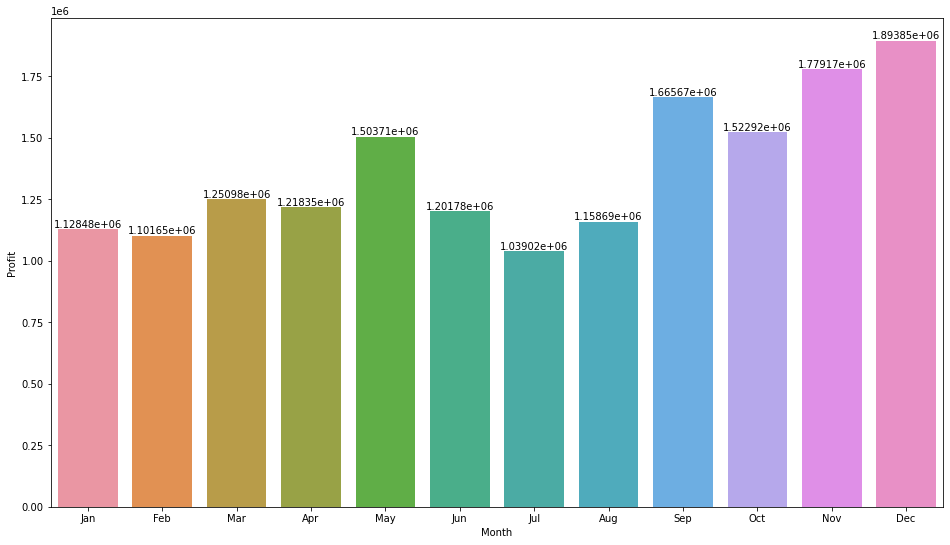

In [189]:
Cab_data_yellow_2017 = Cab_data_yellow[Cab_data_yellow['Year'] == 2017]

Yellow_profit_2017_by_month = []
for i in range(1,13):
    Yellow_profit_2017_by_month.append(sum(Cab_data_yellow_2017[Cab_data_yellow_2017['Month']==i]['Profit']))

# The reason we exclude Jan is because the time interval starts from Jan 31

Yellow_profit_2017_month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

Yellow_profit_2017_by_month = pd.DataFrame(Yellow_profit_2017_by_month, columns = ['Profit'])

Yellow_profit_2017_by_month['Month'] = Yellow_profit_2017_month

plt.figure(figsize=(16,9))
ax = sns.barplot(x='Month',y='Profit',data=Yellow_profit_2017_by_month)
for i in ax.containers:
    ax.bar_label(i,)

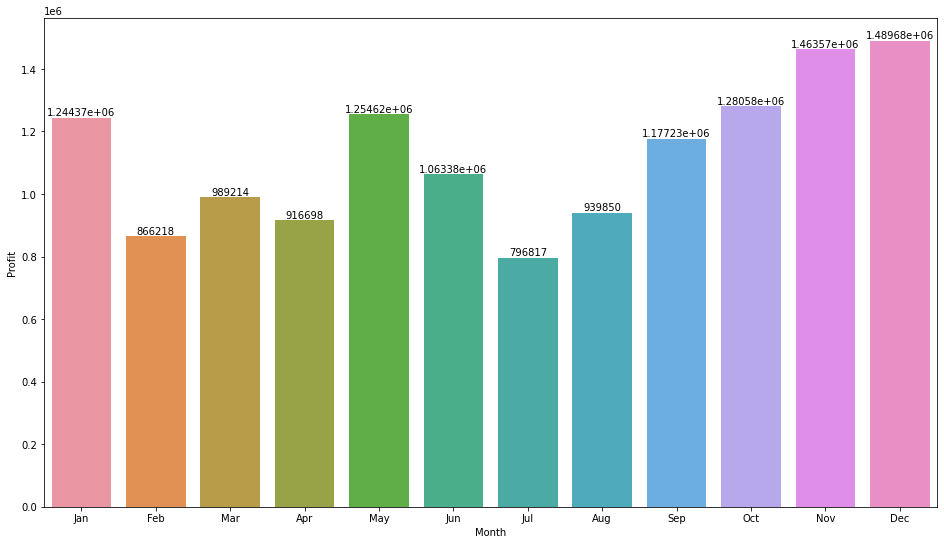

In [190]:
Cab_data_yellow_2018 = Cab_data_yellow[Cab_data_yellow['Year'] == 2018]

Yellow_profit_2018_by_month = []
for i in range(1,13):
    Yellow_profit_2018_by_month.append(sum(Cab_data_yellow_2018[Cab_data_yellow_2018['Month']==i]['Profit']))

# The reason we exclude Jan is because the time interval starts from Jan 31

Yellow_profit_2018_month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

Yellow_profit_2018_by_month = pd.DataFrame(Yellow_profit_2018_by_month, columns = ['Profit'])

Yellow_profit_2018_by_month['Month'] = Yellow_profit_2018_month

plt.figure(figsize=(16,9))
ax = sns.barplot(x='Month',y='Profit',data=Yellow_profit_2018_by_month)
for i in ax.containers:
    ax.bar_label(i,)

Hypothesis 2 answer: From the data visualization above, we can clearly see that, for company 'Pink Cab', larger of its annual profit is made in the last three month of a year for all three years, while for company 'Yellow Cab', the monthly contribution to the annual profit is distributed more equal among all 12 months in a year. One more aspect to notice is, for 'Yellow Cab', its profit made in May every year stands out among other adjacent months.

Hypothesis 3: What is the speatial profit distribution for the two companies (profit v.s city)?

In [191]:
Pink_City_profit = []
for i in range(len(City)):
    j = sum(Cab_data_pink[Cab_data_pink['City'] == City.loc[i]['City']]['Profit'])
    Pink_City_profit.append(j)

City_list = City['City']
Pink_City_profit_list = []
for j in range(len(City)):
    Pink_City_profit_list.append([City.loc[j]['City'], Pink_City_profit[j]])

Pink_City_profit_list = pd.DataFrame(Pink_City_profit_list, columns = ['City', 'Profit'])

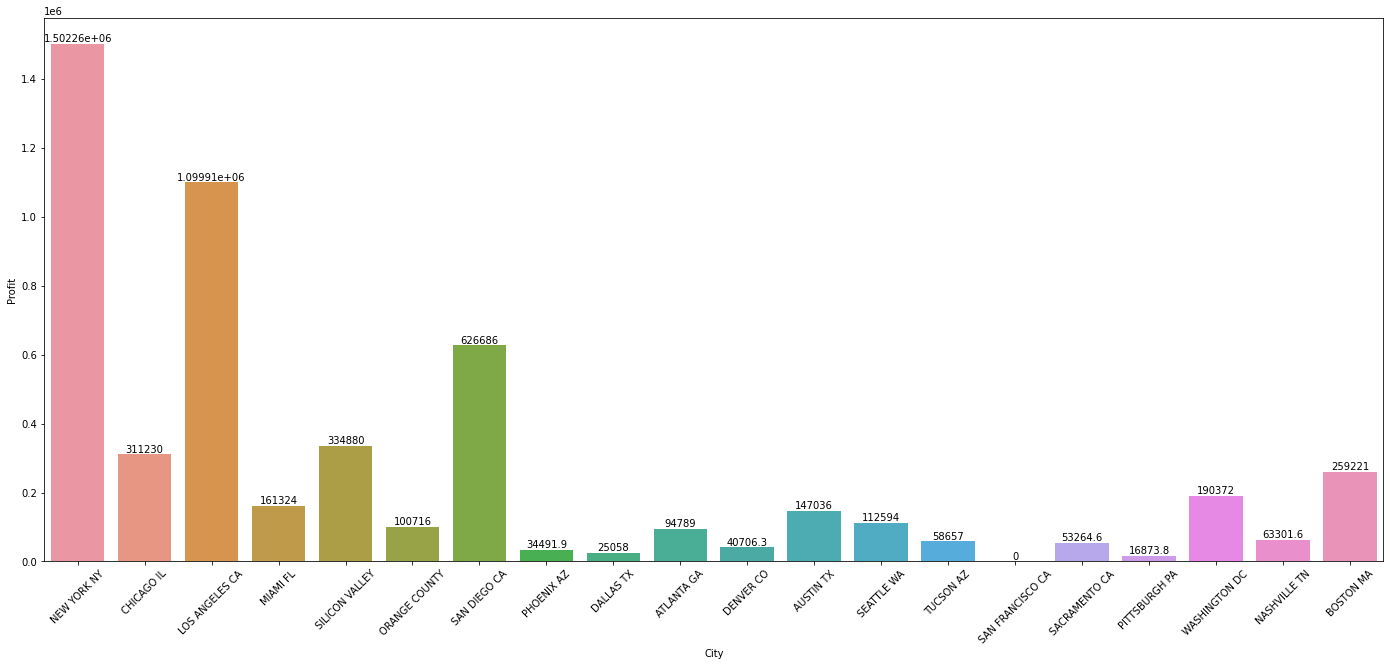

In [192]:
plt.figure(figsize=(24,10))
ax = sns.barplot(x='City',y='Profit',data=Pink_City_profit_list)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()

In [193]:
Yellow_City_profit = []
for i in range(len(City)):
    j = sum(Cab_data_yellow[Cab_data_yellow['City'] == City.loc[i]['City']]['Profit'])
    Yellow_City_profit.append(j)

City_list = City['City']
Yellow_City_profit_list = []
for j in range(len(City)):
    Yellow_City_profit_list.append([City.loc[j]['City'], Yellow_City_profit[j]])

Yellow_City_profit_list = pd.DataFrame(Yellow_City_profit_list, columns = ['City', 'Profit'])

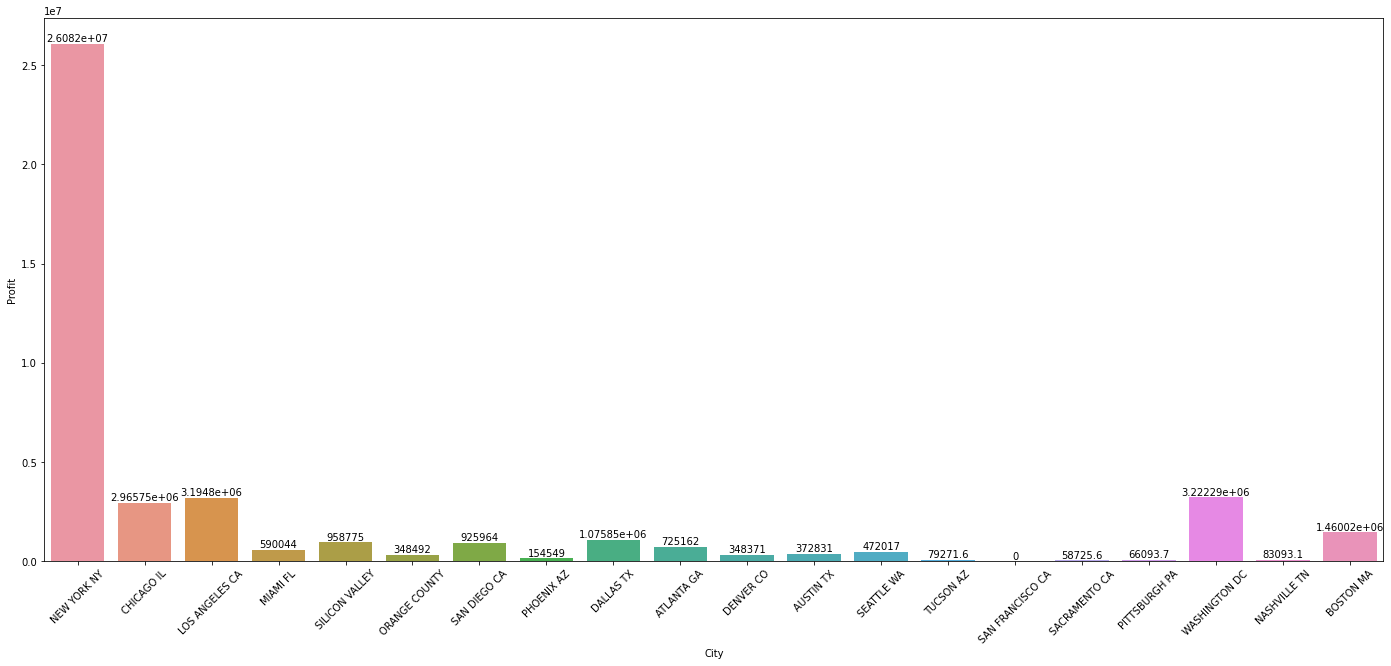

In [194]:
plt.figure(figsize=(24,10))
ax = sns.barplot(x='City',y='Profit',data=Yellow_City_profit_list)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()

Hypothesis 3 answer: both cab companies focus on New York as the main source of their profit. On thing to notice is, comparing to the ratio of profit made by 'Yellow Cab' v.s the profit made by 'Pink Cab' (approximately 10:1), the profit ratio in three cities of California (approximately 3:2) shows that, while 'Yellow Cab' focuses exclusively on its business in New York, 'Pink Cab' also utilizes California as an important source of profit, and CA is the only state in which 'Pink Cab''s business magnitude is comparable to 'Yellow Cab's.

Hypothesis 4: Is there other aspect affecting the profit making of the two companies? For example, payment mode, gender, age and income level of customers, and is there any difference between characteristics of customers for both companies?

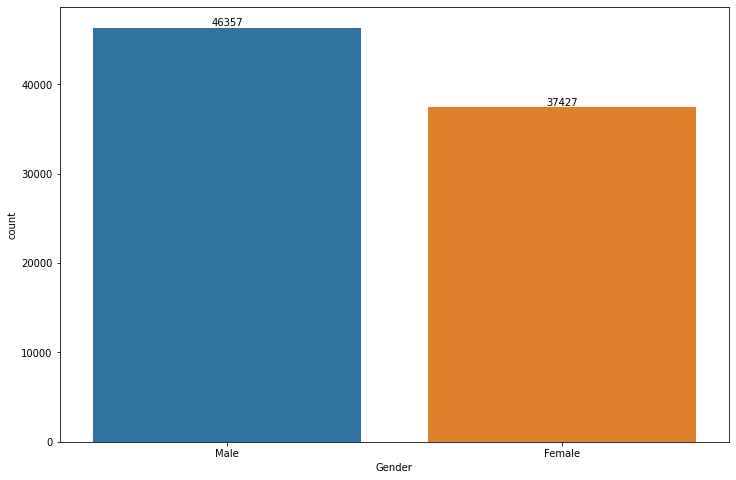

In [201]:
Cab_data_pink = pd.merge(Cab_data_pink, Transaction_ID, on = 'Transaction ID', how = 'left')
Cab_data_pink = pd.merge(Cab_data_pink, Customer_ID, on = 'Customer ID', how = 'left')
plt.figure(figsize=(12,8))
ax = sns.countplot(x = 'Gender', data = Cab_data_pink)
for i in ax.containers:
    ax.bar_label(i,)

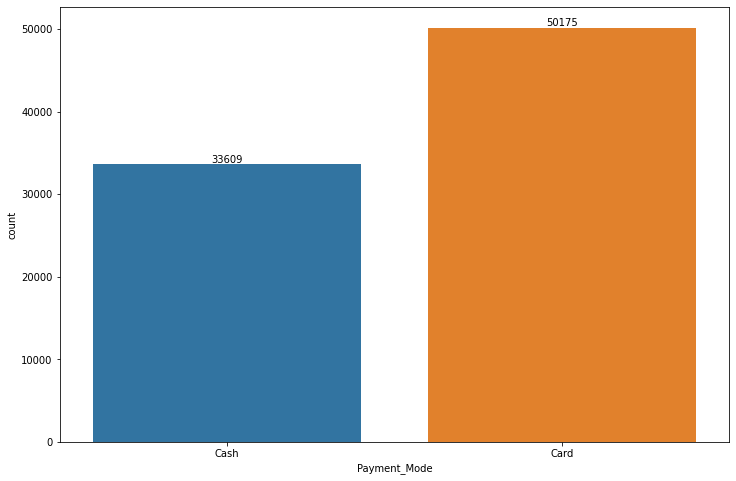

In [202]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x = 'Payment_Mode', data = Cab_data_pink)
for i in ax.containers:
    ax.bar_label(i,)

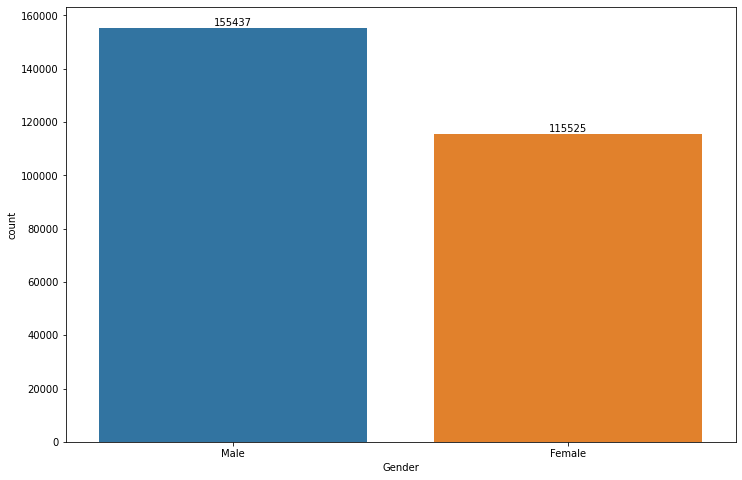

In [203]:
Cab_data_yellow = pd.merge(Cab_data_yellow, Transaction_ID, on = 'Transaction ID', how = 'left')
Cab_data_yellow = pd.merge(Cab_data_yellow, Customer_ID, on = 'Customer ID', how = 'left')

plt.figure(figsize=(12,8))
ax = sns.countplot(x = 'Gender', data = Cab_data_yellow)
for i in ax.containers:
    ax.bar_label(i,)

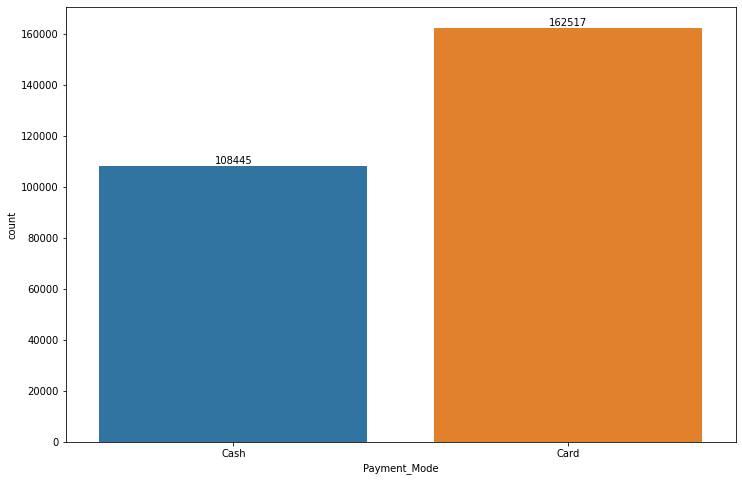

In [204]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x = 'Payment_Mode', data = Cab_data_yellow)
for i in ax.containers:
    ax.bar_label(i,)

In [205]:
Cab_data_pink_mean_profit_card = Cab_data_pink[Cab_data_pink['Payment_Mode'] == 'Card']['Profit'].mean()
Cab_data_yellow_mean_profit_card = Cab_data_yellow[Cab_data_yellow['Payment_Mode'] == 'Card']['Profit'].mean()
Cab_data_pink_mean_profit_cash = Cab_data_pink[Cab_data_pink['Payment_Mode'] == 'Cash']['Profit'].mean()
Cab_data_yellow_mean_profit_cash = Cab_data_yellow[Cab_data_yellow['Payment_Mode'] == 'Cash']['Profit'].mean()

In [206]:
Average_profit_card = pd.DataFrame([['Pink Cab',Cab_data_pink_mean_profit_card ],
                                    ['Yellow Cab',Cab_data_yellow_mean_profit_card]],
                                   columns = ['Company Name', 'Average Profit from Card'])
Average_profit_cash = pd.DataFrame([['Pink Cab',Cab_data_pink_mean_profit_cash ],
                                    ['Yellow Cab',Cab_data_yellow_mean_profit_cash]],
                                   columns = ['Company Name', 'Average Profit from Cash']) 

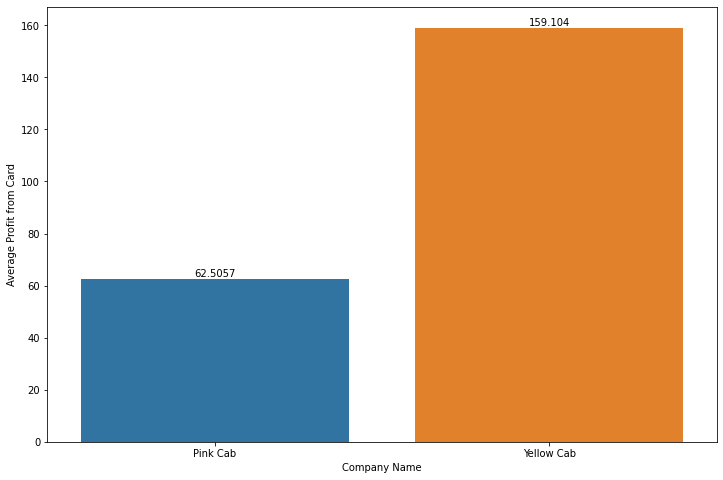

In [207]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Company Name',y='Average Profit from Card',data= Average_profit_card)
for i in ax.containers:
    ax.bar_label(i,)

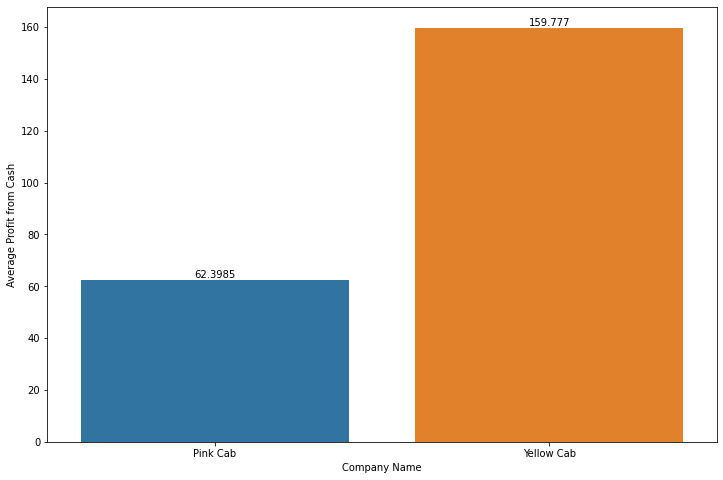

In [208]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Company Name',y='Average Profit from Cash',data= Average_profit_cash)
for i in ax.containers:
    ax.bar_label(i,)

In [209]:
Cab_data_pink_sum_profit_card = sum(Cab_data_pink[Cab_data_pink['Payment_Mode'] == 'Card']['Profit'])
Cab_data_yellow_sum_profit_card = sum(Cab_data_yellow[Cab_data_yellow['Payment_Mode'] == 'Card']['Profit'])
Cab_data_pink_sum_profit_cash = sum(Cab_data_pink[Cab_data_pink['Payment_Mode'] == 'Cash']['Profit'])
Cab_data_yellow_sum_profit_cash = sum(Cab_data_yellow[Cab_data_yellow['Payment_Mode'] == 'Cash']['Profit'])
Total_profit_card = pd.DataFrame([['Pink Cab',Cab_data_pink_sum_profit_card ],
                                    ['Yellow Cab',Cab_data_yellow_sum_profit_card]],
                                   columns = ['Company Name', 'Sum Profit from Card'])
Total_profit_cash = pd.DataFrame([['Pink Cab',Cab_data_pink_sum_profit_cash ],
                                    ['Yellow Cab',Cab_data_yellow_sum_profit_cash]],
                                   columns = ['Company Name', 'Sum Profit from Cash']) 

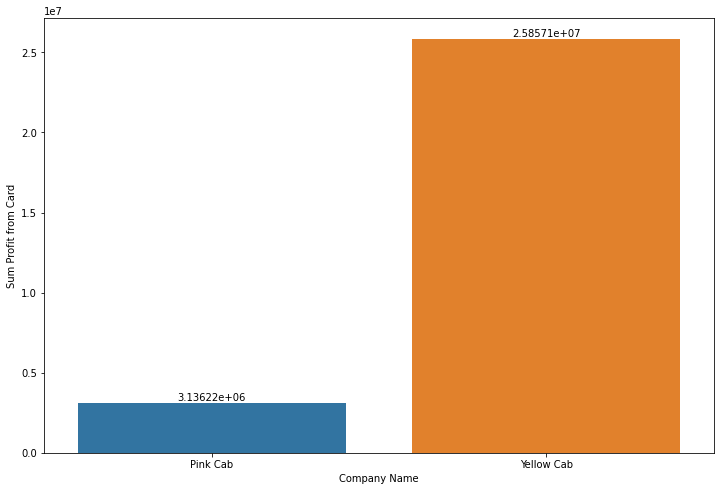

In [210]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Company Name',y='Sum Profit from Card',data= Total_profit_card)
for i in ax.containers:
    ax.bar_label(i,)

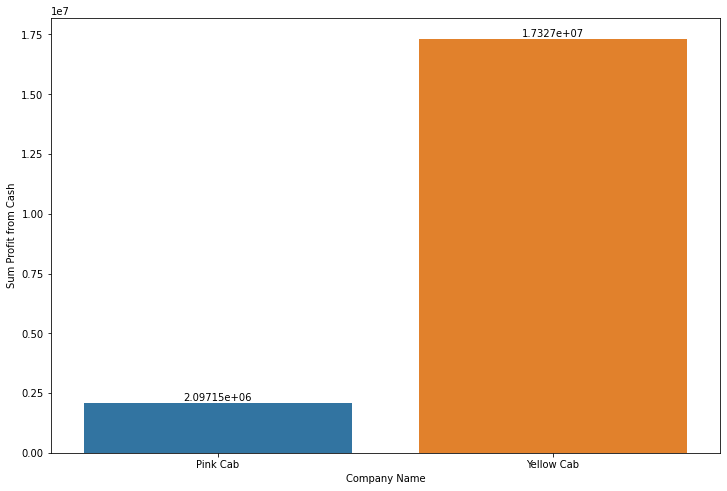

In [211]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Company Name',y='Sum Profit from Cash',data= Total_profit_cash)
for i in ax.containers:
    ax.bar_label(i,)

E:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

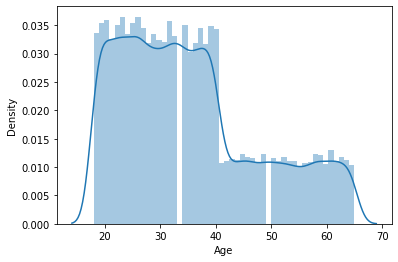

In [212]:
sns.distplot(Cab_data_pink['Age'])

E:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

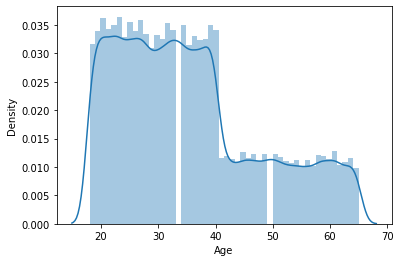

In [213]:
sns.distplot(Cab_data_yellow['Age'])

In [216]:
pink_income_level = []
for i in range(len(Cab_data_pink)):
    j = Cab_data_pink.loc[i]['Income (USD/Month)']
    if j < 4000:
        pink_income_level.append('less than 4000')
    elif 4000<=j<=10000:
        pink_income_level.append('4000 to 10000')
    else:
        pink_income_level.append('greater than 10000')

In [218]:
Cab_data_pink['Income level'] = pink_income_level

In [220]:
yellow_income_level = []
for i in range(len(Cab_data_yellow)):
    j = Cab_data_yellow.loc[i]['Income (USD/Month)']
    if j < 4000:
        yellow_income_level.append('less than 4000')
    elif 4000<=j<=10000:
        yellow_income_level.append('4000 to 10000')
    else:
        yellow_income_level.append('greater than 10000')

Cab_data_yellow['Income level'] = yellow_income_level

E:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


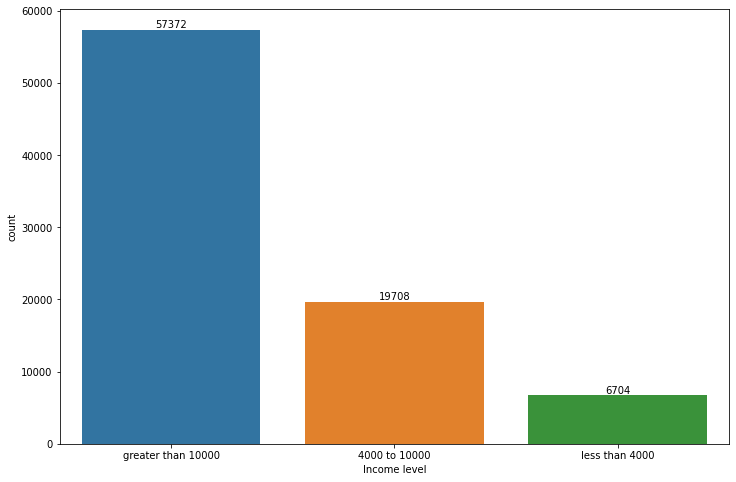

In [228]:
plt.figure(figsize=(12,8))
ax = sns.countplot(Cab_data_pink['Income level'])
for i in ax.containers:
    ax.bar_label(i,)

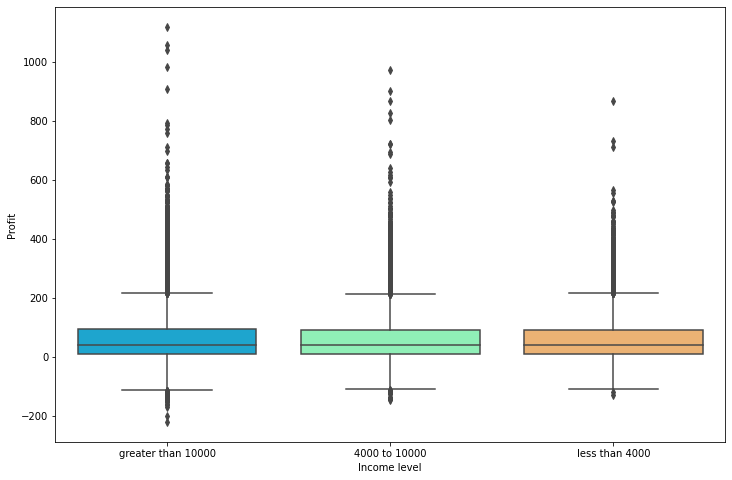

In [229]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x = 'Income level', y = 'Profit', data = Cab_data_pink, palette='rainbow',meanline=True)

E:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


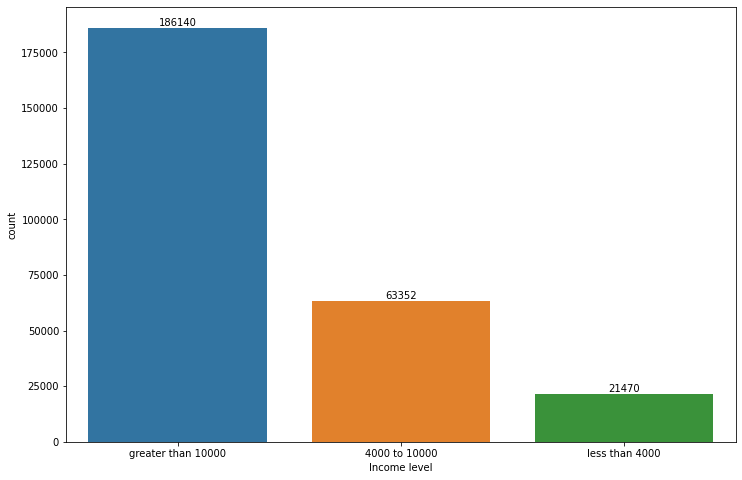

In [231]:
plt.figure(figsize=(12,8))
ax = sns.countplot(Cab_data_yellow['Income level'])
for i in ax.containers:
    ax.bar_label(i,)

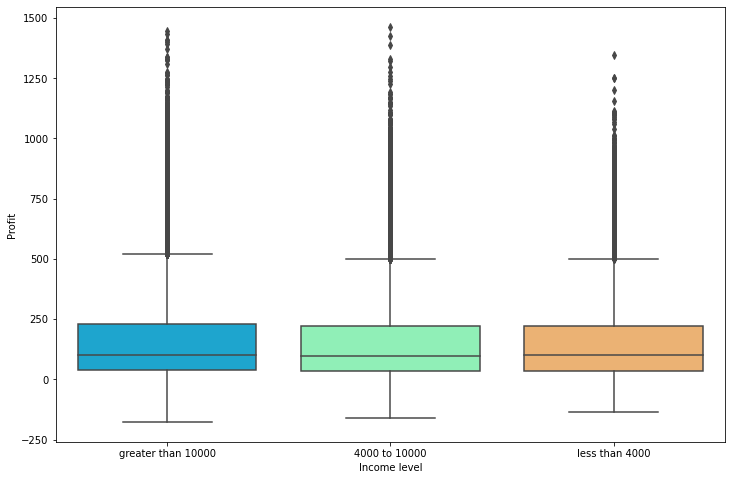

In [232]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x = 'Income level', y = 'Profit', data = Cab_data_yellow, palette='rainbow',meanline=True)

In [233]:
pink_age_classifier = []
for i in range(len(Cab_data_pink)):
    if Cab_data_pink.loc[i]['Age']<26:
        pink_age_classifier.append('younger than 25')
    elif Cab_data_pink.loc[i]['Age'] in range(26, 51):
        pink_age_classifier.append('25 to 50')
    elif Cab_data_pink.loc[i]['Age']>50:
        pink_age_classifier.append('older than 50')

Cab_data_pink['Age Classifier'] = pink_age_classifier
        
yellow_age_classifier = []
for i in range(len(Cab_data_yellow)):
    if Cab_data_yellow.loc[i]['Age']<26:
        yellow_age_classifier.append('younger than 25')
    elif Cab_data_yellow.loc[i]['Age'] in range(26, 51):
        yellow_age_classifier.append('25 to 50')
    elif Cab_data_yellow.loc[i]['Age']>50:
        yellow_age_classifier.append('older than 50')
        
Cab_data_yellow['Age Classifier'] = yellow_age_classifier

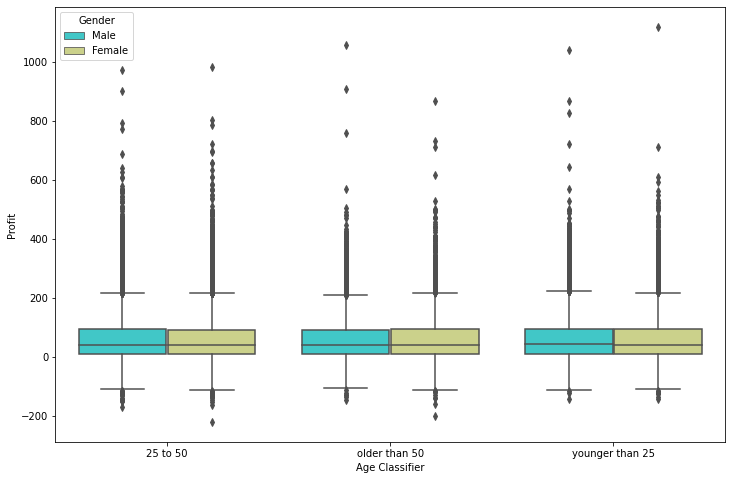

In [234]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="Age Classifier", y="Profit", hue="Gender", data=Cab_data_pink,palette='rainbow',meanline=True)

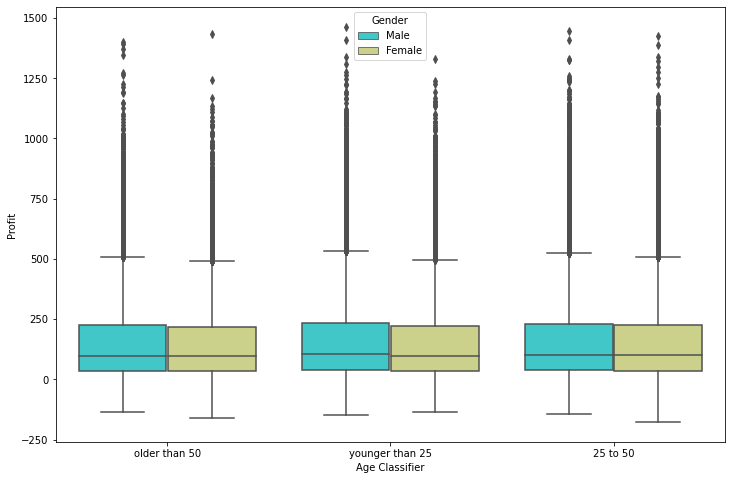

In [235]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="Age Classifier", y="Profit", hue="Gender", data=Cab_data_yellow,palette='rainbow')

Hypothesis 4 answer: Judging from the plots, the portion of profit made from card and cash payments are approximately the same for both companies. For both companies, he ratio of male:female for customers' gender of all transactions is also close. The distribution of customers'age and income level, as well as the portion of profit made from each incomve level is also similar for both companies. There is no significant difference between profit made from different age groups for a single ride among two companies. Overall, given the information of the customer fixed, 'Yellow Cab' tends to make more money from a single ride of this customer.

Hypothesis 5: Is there any difference between the capacity of the two companies in developing long term customers?

In [236]:
Pink_cab_data_number_of_ride = []
Pink_cab_user = []
Pink_cab_used = []
for i in range(len(Cab_data_pink['Customer ID'])):
    k = Cab_data_pink.loc[i]['Customer ID']
    j = len(Cab_data_pink[Cab_data_pink['Customer ID'] == k])
    m = Cab_data_pink.loc[i]['Gender']
    if k not in Pink_cab_used:
        Pink_cab_user.append([k,j,m])
        Pink_cab_used.append(k)

In [237]:
Cab_data_pink_time_of_use = pd.DataFrame(Pink_cab_user, columns = ['Customer ID','Number of order','Gender'])

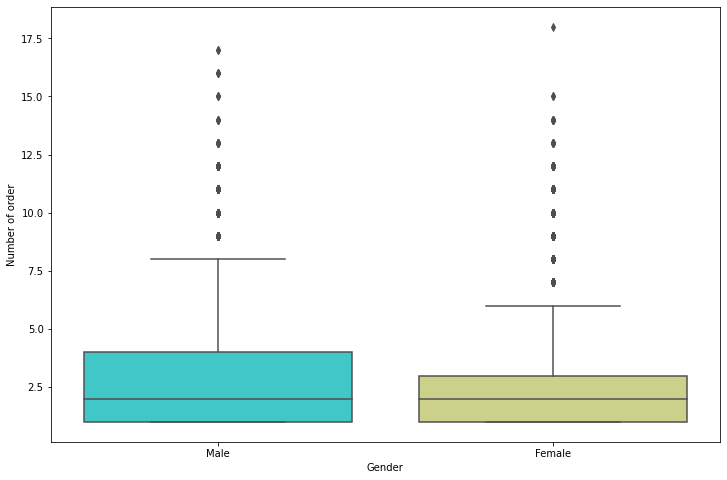

In [239]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='Gender',y='Number of order', data=Cab_data_pink_time_of_use,palette='rainbow')

In [241]:
Yellow_cab_data_number_of_ride = []
Yellow_cab_user = []
Yellow_cab_used = []
for i in range(len(Cab_data_yellow['Customer ID'])):
    k = Cab_data_yellow.loc[i]['Customer ID']
    j = len(Cab_data_yellow[Cab_data_yellow['Customer ID'] == k])
    m = Cab_data_yellow.loc[i]['Gender']
    if k not in Yellow_cab_used:
        Yellow_cab_user.append([k,j,m])
        Yellow_cab_used.append(k)

In [242]:
Cab_data_yellow_time_of_use = pd.DataFrame(Yellow_cab_user, columns = ['Customer ID','Number of order','Gender'])

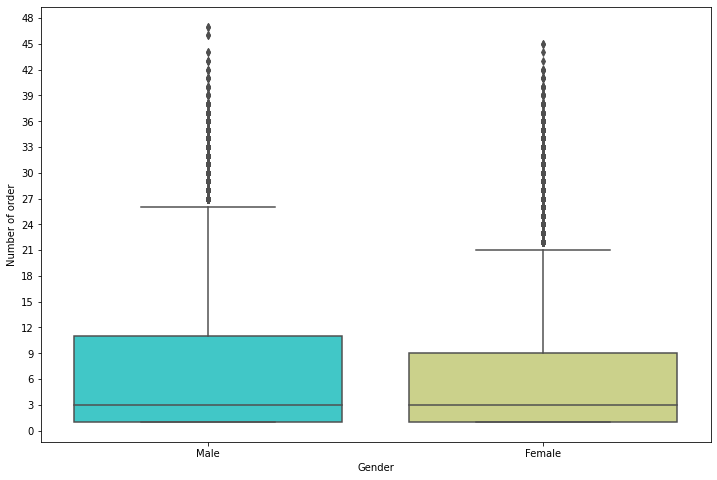

In [243]:
plt.figure(figsize=(12,8))
plt.yticks(list(range(0,61,3)))
ax = sns.boxplot(x='Gender',y='Number of order', data=Cab_data_yellow_time_of_use,palette='rainbow')

Hypothesis answer: From the chart above, for 'Yellow Cab', customer's average ride demand is approximately 3, comparing to 2.5 for 'Pink Cab'. Gender of customer doesn't play a significant roll in development of long term customers for both companies.